In [1]:
import numpy as np
from pyqtgraph.Qt import QtGui, QtCore
import pyqtgraph as pg
import seaborn
import scipy.io
import scipy.stats
import matplotlib as plt
from lab8_common import *
import random
import math

def ray_lik(data, part_sensor_data):
    # data is 11x1
    # part sensor data is 11 x n
    summation = 0
    sigma = 10
    summation = np.sum(np.absolute(data - part_sensor_data), axis = 0)
    summation = summation*(sigma)
    return np.exp(-summation)

def getexs(parts, lik, t, exs):
    x = parts[0,:] * 1
    y = parts[1,:] * 1
    exs[0,t] = np.mean(x)
    exs[1,t] = np.mean(y)
    return exs

# upload the data  
data_mat = scipy.io.loadmat('sensors.mat')
data = data_mat['sonars']
true_states = data_mat['true_states']

# We have 10000 points and they start with all equal weights
N = 10000
weights = np.ones(N)/N

# get your first random particles, they're all equally random 
# return N weights with equal weights that sum to 1
x = [random.random() for f in range(0, N)]
y = [random.random() for f in range(0, N)]
angle = np.random.uniform(0,2*np.pi, N)

#particles 3 x N
parts = np.ones((3,N))
parts[0,:] = x
parts[1,:] = y
parts[2,:] = angle

# create your map, name it room map
room_map = create_map()

# particle data = part sensor data is a n.11 matrix. 
# Ray_lik is likelihood function p(y|z)  vectorized and returns nx1 matrix

app = QtGui.QApplication( [] )
win = pg.GraphicsWindow( title="Particle filter" )
win.resize( 600, 600 )
win.setWindowTitle( 'Particle filter' )
pg.setConfigOptions( antialias=True )
 
p3 = win.addPlot( title="Room map" )


for i in range( 0, room_map.shape[0] ):
    p3.plot( [room_map[i,0], room_map[i,2]], [room_map[i,1], room_map[i,3]] )
    
p3.setXRange( -0.1, 1.1 )
p3.setYRange( -0.1, 1.1 ) 
ts_plot = None
ex_plot = None
numberstate =  true_states.shape[1]
exs = np.zeros((2,numberstate))

# for every t:
#     I should already have 10000 particles on the map    x
#     should already have weights are all 1/N    x
#     I'm making a proposal. Each particle takes a step (adding gaussian x y z)'
#     multivariate gaussian (3x3 diagonal sigma) 1x3  of zero for mean
#     that spits out a 3x1 matrix of numbers ,add them to x y and z
#     np.random.multivariatenormal(mean, cov, 10000) returns 3xN.T ->Nx3
#     cast your rays, create proposal and get likelihood
#     multipy them by all the weights, normalize it
#     resample from that 
#     reset your weights
#     plot.

# resample look at all my weights, np.random.choice -> pick numbers based on the weights
# take a normal gaussian and then pick a random spot and it to x and y
# cov = [[.05, 0, 0], [0, .05, 0], [0, 0, .05]]
# originalmean = [0,0,0]

for t in xrange(0, numberstate):
   
    if ts_plot == None: 
        ts_plot = p3.plot( true_states[0,0:t+1], true_states[1,0:t+1], pen=(0,0,255) )
        ex_plot = p3.plot( exs[0,0:t+1], exs[1,0:t+1], pen=(0,255,0) )
        pts = p3.scatterPlot( parts[0,:], parts[1,:], symbol='o', size=1, pen=(255,100,100) )
    
    else:
        ts_plot.setData( true_states[0,0:t+1], true_states[1,0:t+1] )
        ex_plot.setData( exs[0,0:t+1], exs[1,0:t+1] )
        pts.setData( parts[0,:], parts[1,:] )
    
    parts[0,:] = parts[0,:] + np.random.normal(0, .015, N)
    parts[1,:] = parts[1,:] + np.random.normal(0, .015, N)
    parts[2,:] = parts[2,:] + np.random.normal(0, .4, N)
    
    part_sensor_data = cast_rays( parts, room_map )  
    liks = ray_lik( data[:,t:t+1], part_sensor_data.T ).T
    weights = np.full((N, 1), (1.0/N))
    liks = ray_lik( data[:,t:t+1], part_sensor_data.T ).T
    weights *= liks.reshape((N,1))
    weights /= sum(weights)
    parts = parts[:, np.random.choice(parts.shape[1], size=N, p=weights[:,0])]
    getexs(parts, liks, t, exs)
    pg.QtGui.QApplication.processEvents()
    
    


/Users/catmcqueen/anaconda/lib/python2.7/site-packages/pyqtgraph/graphicsItems/ScatterPlotItem.py:186: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.atlasData[x:x+w, y:y+h] = rendered[key]
/Users/catmcqueen/anaconda/lib/python2.7/site-packages/pyqtgraph/graphicsItems/ScatterPlotItem.py:148: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  arr = self.atlasData[x:x+w, y:y+w]
/Users/catmcqueen/anaconda/lib/python2.7/site-packages/pyqtgraph/graphicsItems/ScatterPlotItem.py:183: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.atlasData = np.zeros((width, height, 4), dtype=np.ubyte)


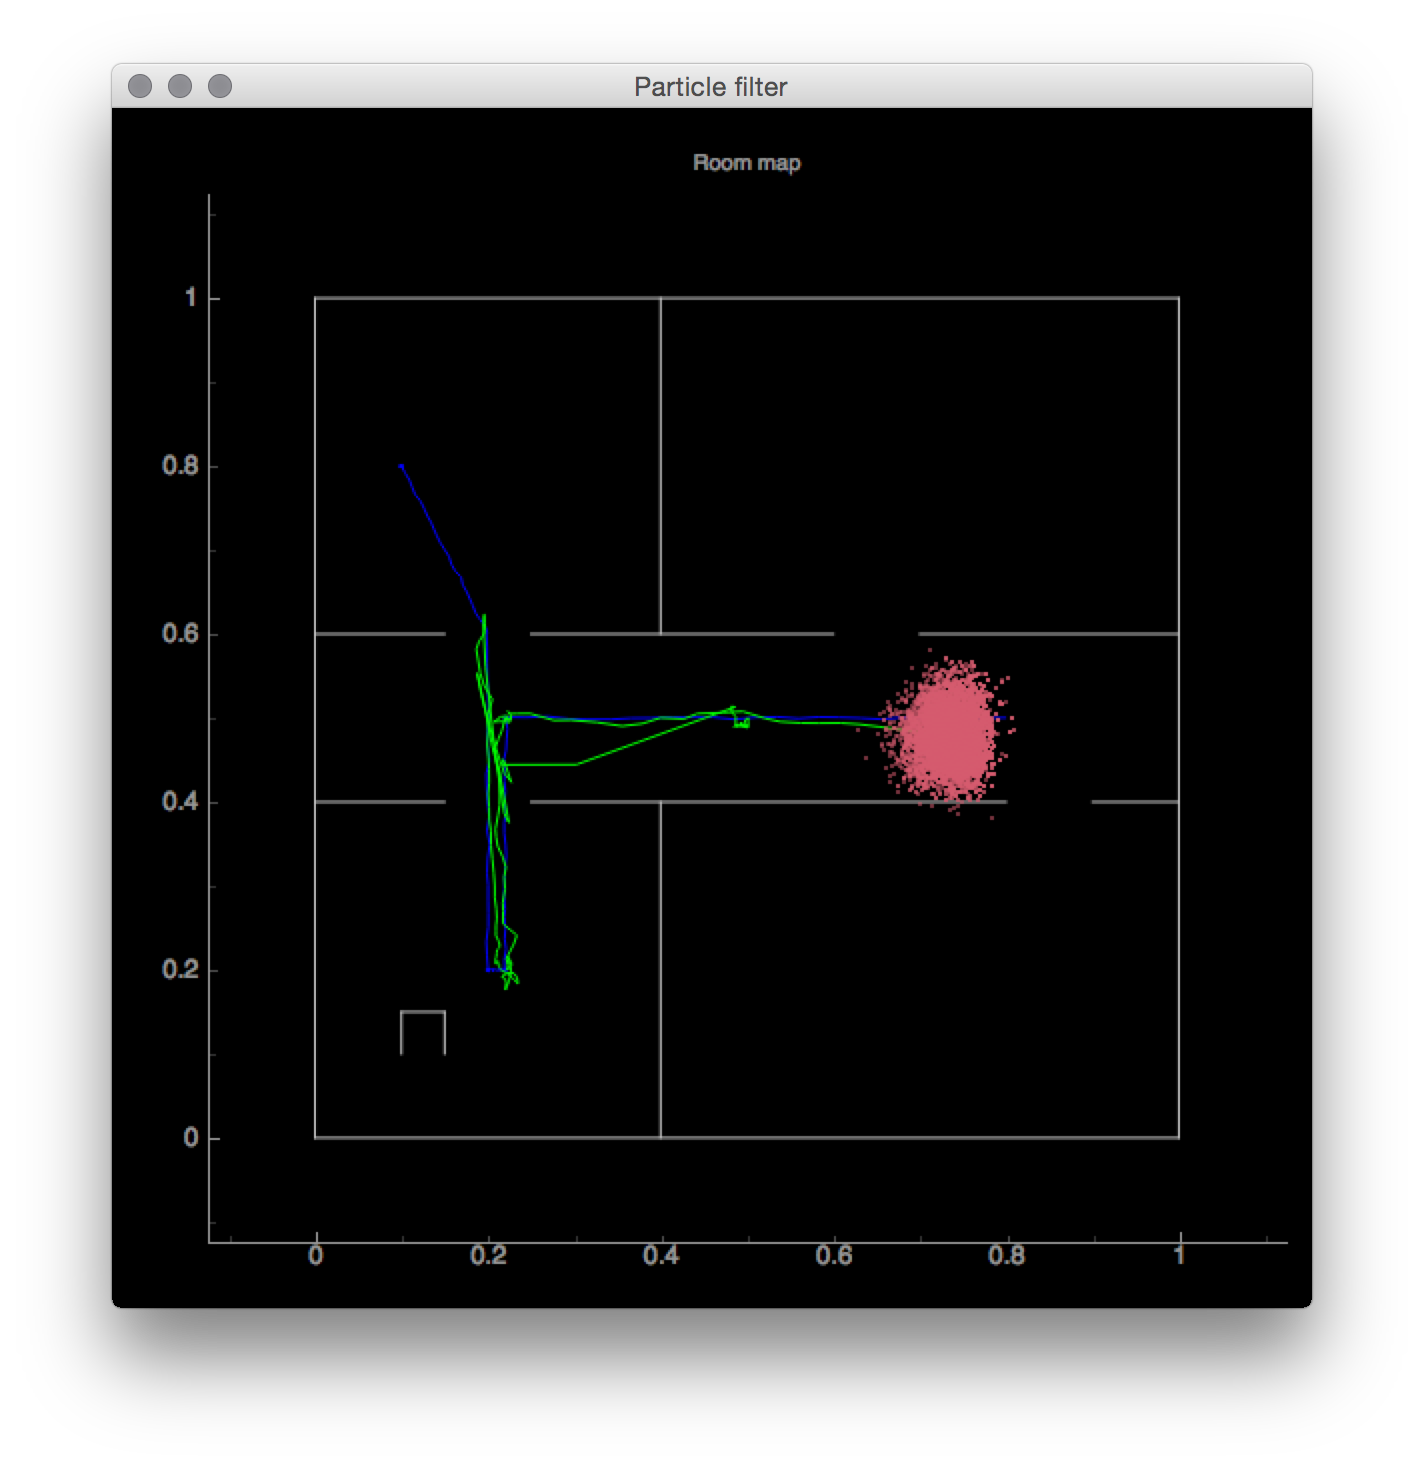

In [2]:
from IPython.display import Image as display

display(filename = 'Idontcare.png')